In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
import warnings

warnings.filterwarnings("ignore")


In [55]:
df = pd.read_csv(r"D:\data analyst\projects\Employee Productivity and Satisfaction HR Data\hr_dashboard_data.csv")

In [56]:
df

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216


In [57]:
df.columns

Index(['Name', 'Age', 'Gender', 'Projects Completed', 'Productivity (%)',
       'Satisfaction Rate (%)', 'Feedback Score', 'Department', 'Position',
       'Joining Date', 'Salary'],
      dtype='object')

# Problem Statement:

### The objective of this project is to analyze the factors that contribute to employee performance within the organization using both descriptive and inferential statistics techniques. By examining a comprehensive dataset encompassing personal demographics, performance metrics, and job details, we aim to identify key drivers of high performance and areas for improvement, as well as draw broader conclusions about the employee population.

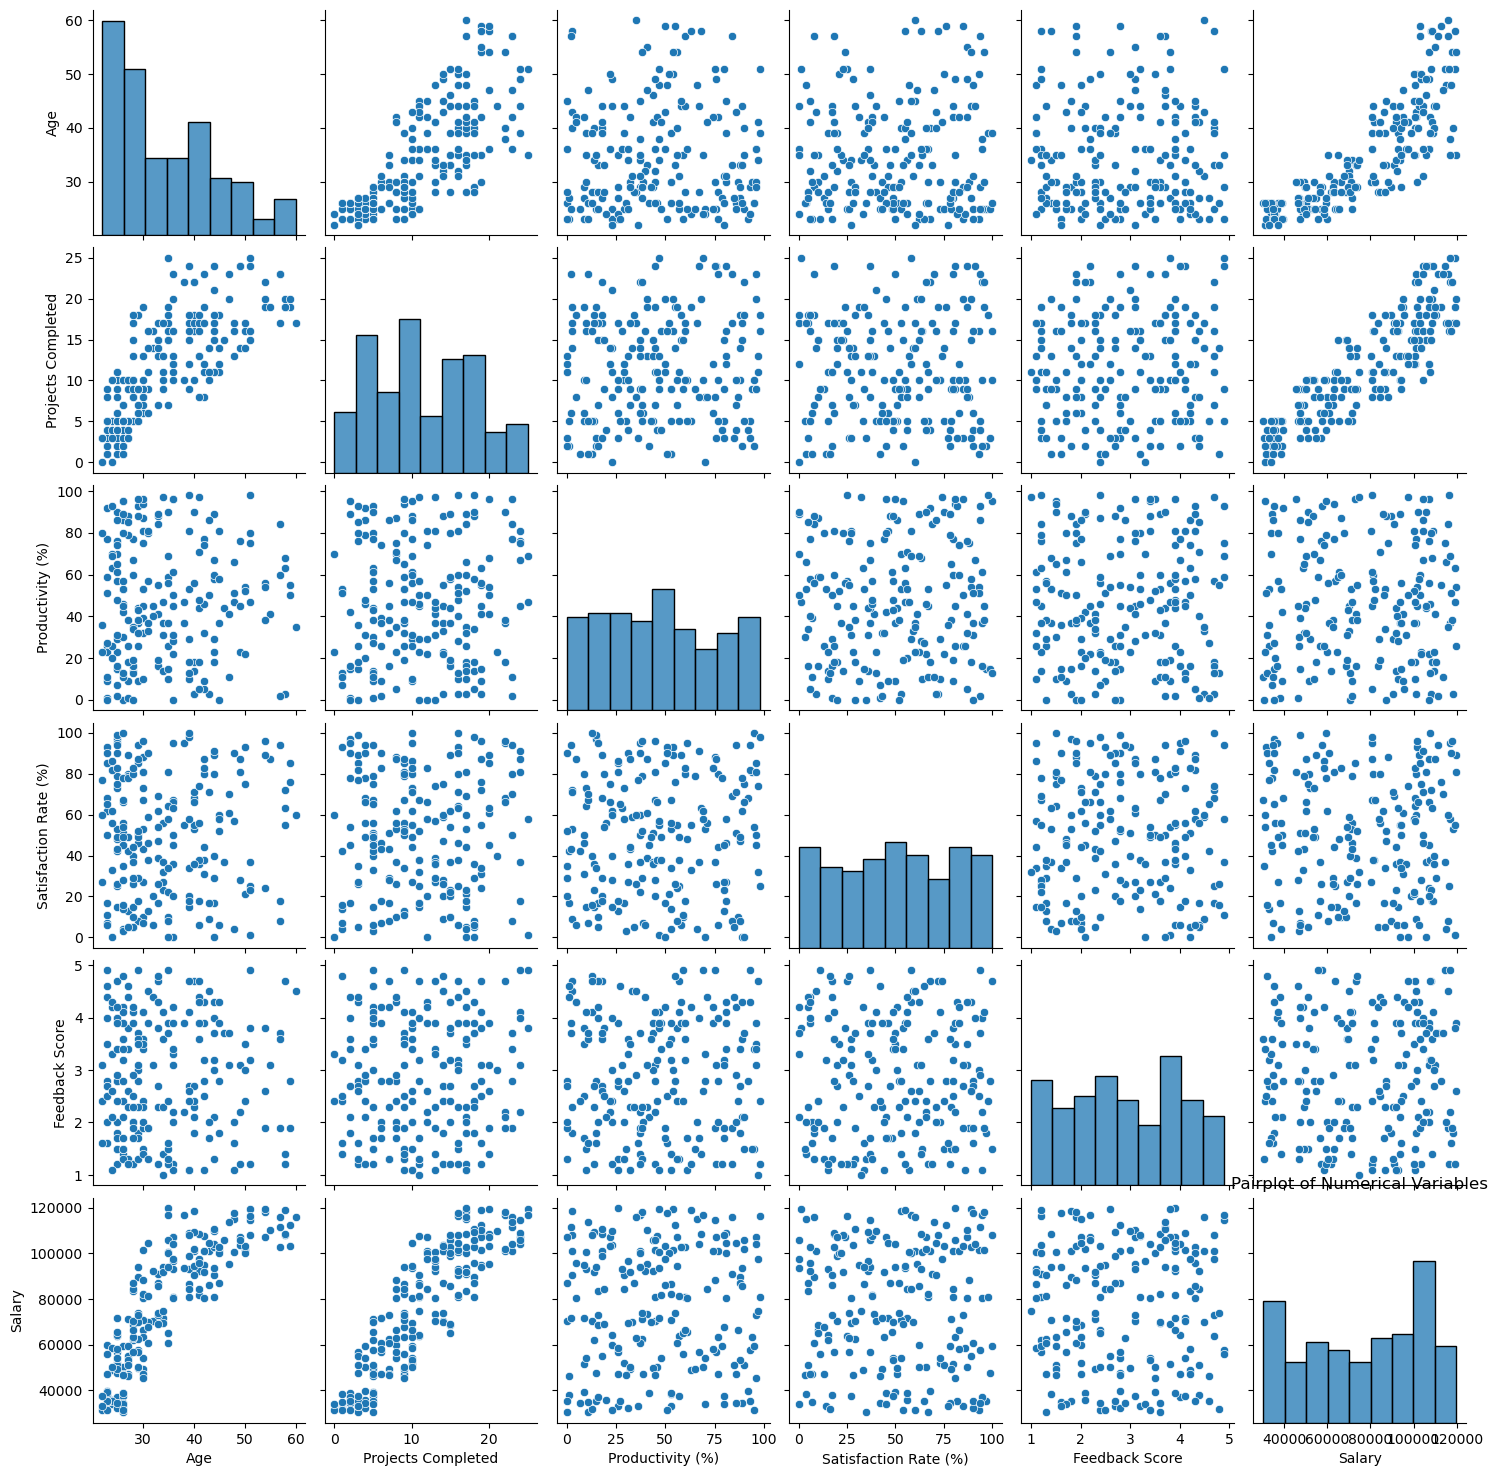

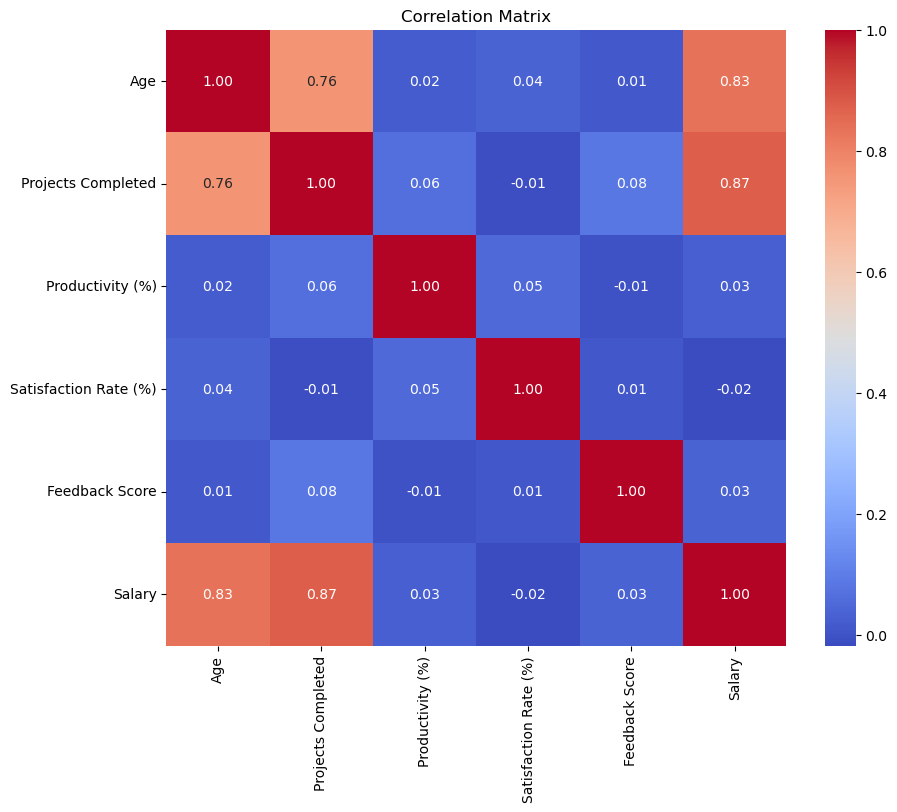

In [58]:
numeric_columns = ['Age', 'Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)', 'Feedback Score', 'Salary']
sns.pairplot(df[numeric_columns])
plt.title('Pairplot of Numerical Variables')
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [59]:
x = df[['Age', 'Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)', 'Feedback Score', 'Salary']].corr()

In [60]:
x

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary
Age,1.000000,0.758364,0.021193,0.035284,0.012014,0.834550
Projects Completed,0.758364,1.000000,0.061707,-0.010815,0.083170,0.874329
Productivity (%),0.021193,0.061707,1.000000,0.049897,-0.005948,0.025519
Satisfaction Rate (%),0.035284,-0.010815,0.049897,1.000000,0.008068,-0.018302
Feedback Score,0.012014,0.083170,-0.005948,0.008068,1.000000,0.034818
Salary,0.834550,0.874329,0.025519,-0.018302,0.034818,1.000000


## Age vs. Salary: 
### There is a strong positive correlation of approximately 0.83 between age and salary. This suggests that as employees get older, their salaries tend to increase.

## Projects Completed vs. Salary: 
### There is a strong positive correlation of approximately 0.87 between the number of projects completed and salary. This indicates that employees who complete more projects tend to have higher salaries.

## Age vs. Projects Completed: 
### There is a strong positive correlation of approximately 0.76 between age and the number of projects completed. This suggests that older employees tend to complete more projects.


### Overall, the strongest correlations are observed between age, projects completed, and salary, indicating that these variables are closely related within the dataset

# 1)Gender Disparities in Salary And Gender Disparities in Productivity, Satisfaction Rate, and Feedback Scores

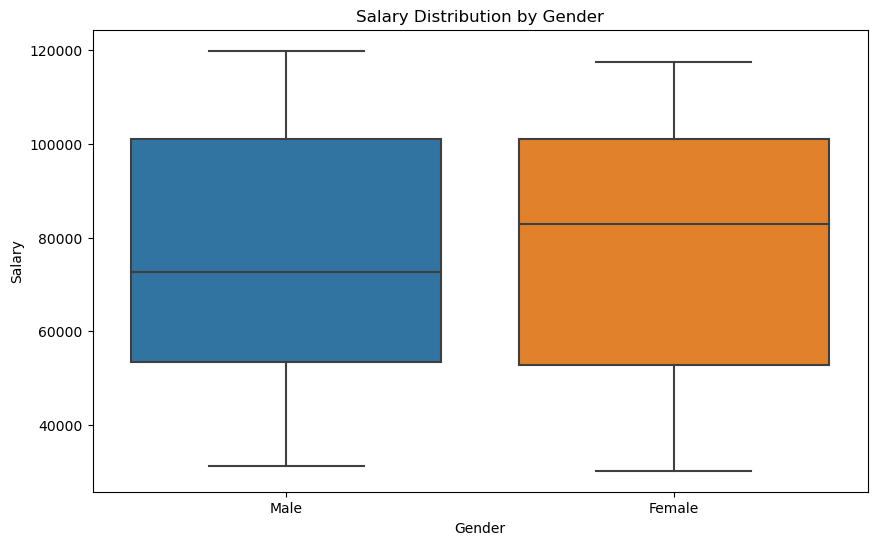

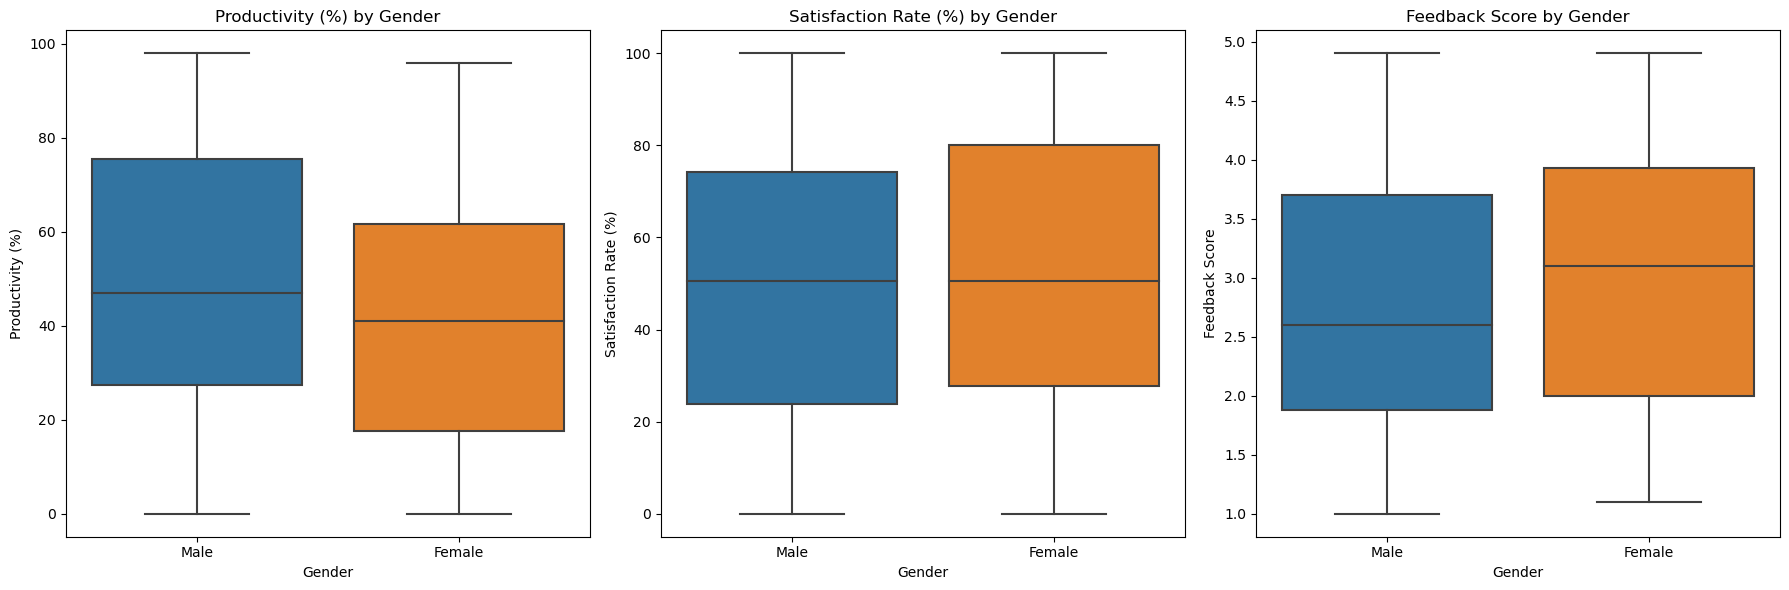

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

metrics = ['Productivity (%)', 'Satisfaction Rate (%)', 'Feedback Score']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, metric in enumerate(metrics):
    sns.boxplot(x='Gender', y=metric, data=df, ax=axes[i])
    axes[i].set_title(f'{metric} by Gender')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(metric)
plt.tight_layout()
plt.show()


## Female Employees:

### The average salary for female employees is approximately 76,985.22, with a standard deviation of approximately 26,924.18.
### The salary range for female employees spans from a minimum of 30,231 to a maximum of 117,458.

## Male Employees:

### The average salary for male employees is slightly lower, at approximately 76,253.27, with a standard deviation of approximately 27,370.21.
### The salary range for male employees spans from a minimum of 31,230 to a maximum of 119,895.

### The summary statistics suggest that there is a slight difference in average salary between male and female employees, with female employees having a slightly higher average salary compared to male employees. However, the difference is relatively small, and both genders exhibit similar salary distributions with comparable ranges and standard deviations.

# 2) Departments Performance Comparison:

           Projects Completed                  Productivity (%)         \
                         mean median       std             mean median   
Department                                                               
Finance             12.317073   11.0  6.080456        42.268293   38.0   
HR                  10.531250   10.0  6.475683        48.125000   51.5   
IT                  11.657895   10.5  6.342803        56.342105   62.0   
Marketing           11.738095   11.5  6.548355        44.261905   44.0   
Sales               10.914894    9.0  6.710892        44.212766   42.0   

                      Satisfaction Rate (%)                   Feedback Score  \
                  std                  mean median        std           mean   
Department                                                                     
Finance     24.443838             50.048780   49.0  24.350515       2.709756   
HR          28.990265             51.625000   58.5  30.893939       2.625000   
IT     

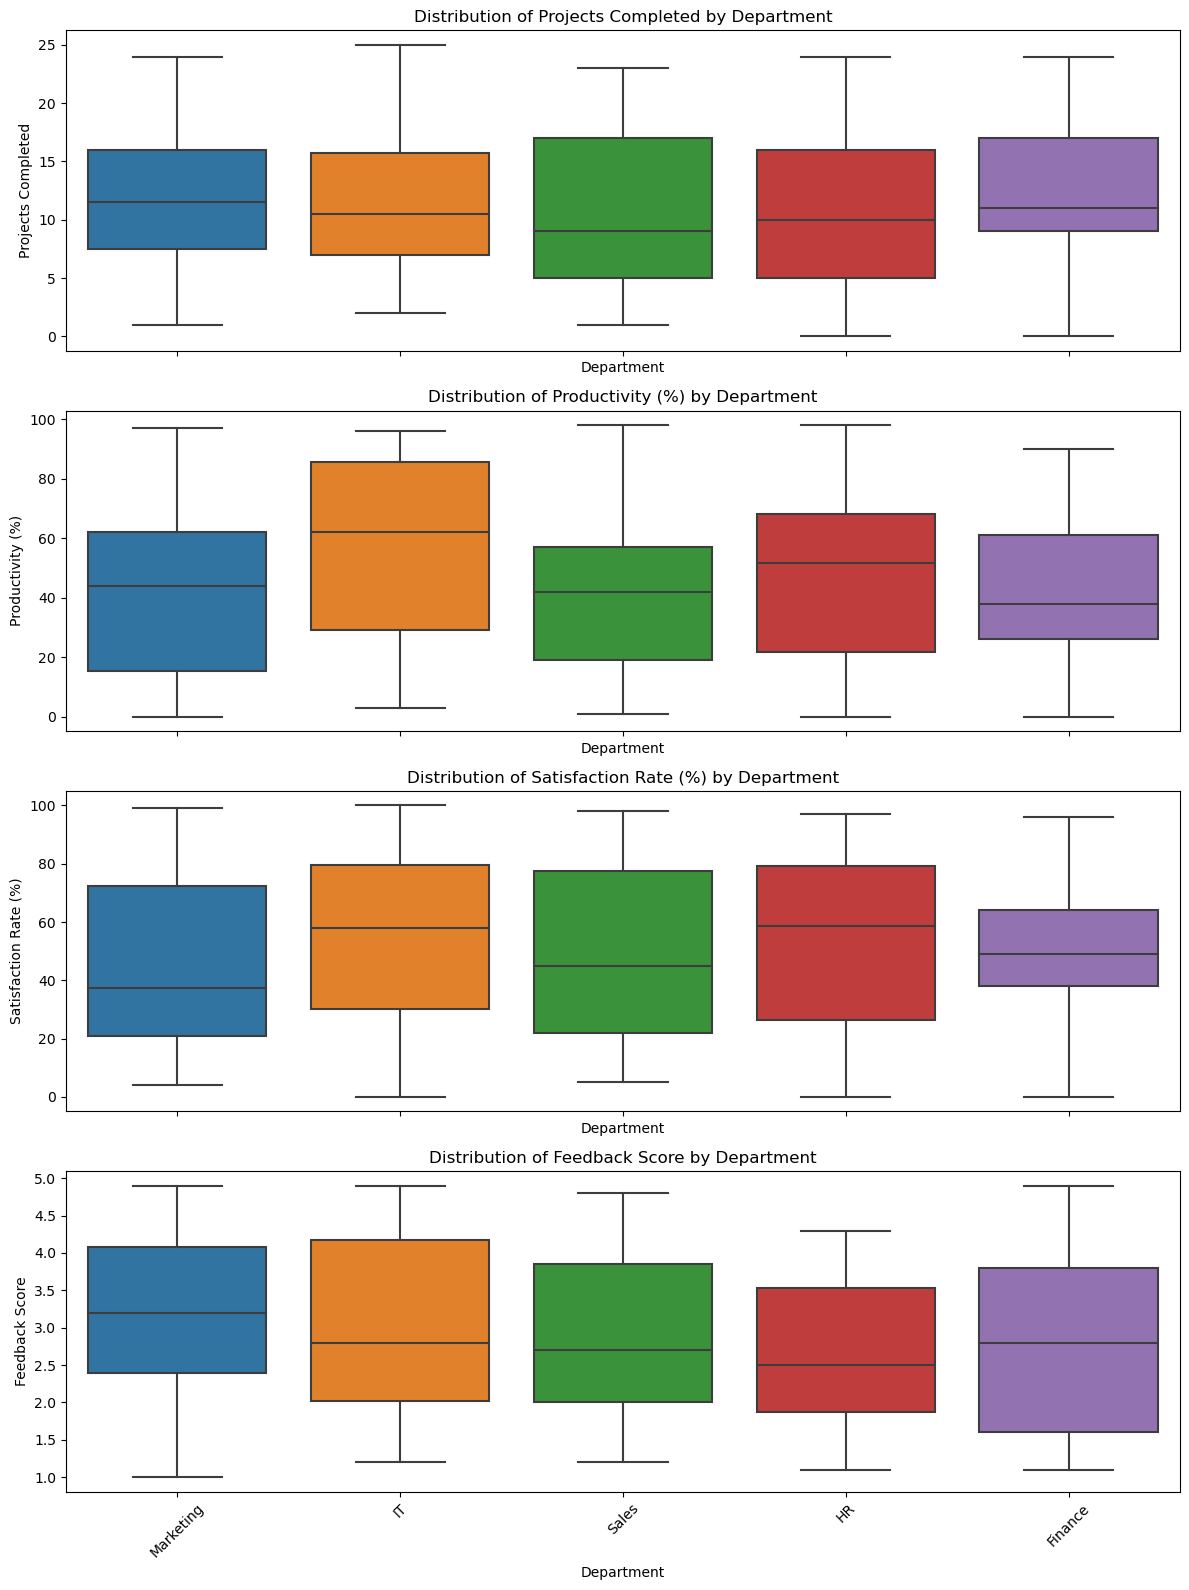

Top performing department in terms of projects completed: Finance
Department with lowest average feedback score: HR


In [62]:
performance_metrics = ['Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)', 'Feedback Score']

department_performance = df.groupby('Department')[performance_metrics].agg(['mean', 'median', 'std'])
print(department_performance)

fig, axes = plt.subplots(len(performance_metrics), 1, figsize=(12, 16), sharex=True)
for i, metric in enumerate(performance_metrics):
    sns.boxplot(x='Department', y=metric, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {metric} by Department')
    axes[i].set_ylabel(metric)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_performing_departments = department_performance['Projects Completed']['mean'].idxmax()
print(f"Top performing department in terms of projects completed: {top_performing_departments}")

lowest_performing_departments = department_performance['Feedback Score']['mean'].idxmin()
print(f"Department with lowest average feedback score: {lowest_performing_departments}")


## 1)Finance Department:
 The average number of projects completed is approximately 12.32, with a standard deviation of approximately 6.08.
 The department shows a relatively consistent performance level, with a minimum of 0 projects completed and a maximum of 24 projects completed.

## 2)HR Department:
The average number of projects completed is approximately 10.53, with a standard deviation of approximately 6.48.
 The HR department has a wide range of project completions, from 0 to 24 projects, indicating variability in workload or project complexity.

## 3)IT Department:
 The average number of projects completed is approximately 11.66, with a standard deviation of approximately 6.34.
The IT department shows a relatively consistent performance level, with a minimum of 2 projects completed and a maximum of 25 projects completed.

## 4)Marketing Department:
 The average number of projects completed is approximately 11.74, with a standard deviation of approximately 6.55.
 Similar to the IT department, the marketing department exhibits variability in project completions, with a range from 1 to 24 projects.

## 5)Sales Department:
 The average number of projects completed is approximately 10.91, with a standard deviation of approximately 6.71.
 The sales department shows a wide range of project completions, from 1 to 23 projects, suggesting differences in workload or project scope among employees.

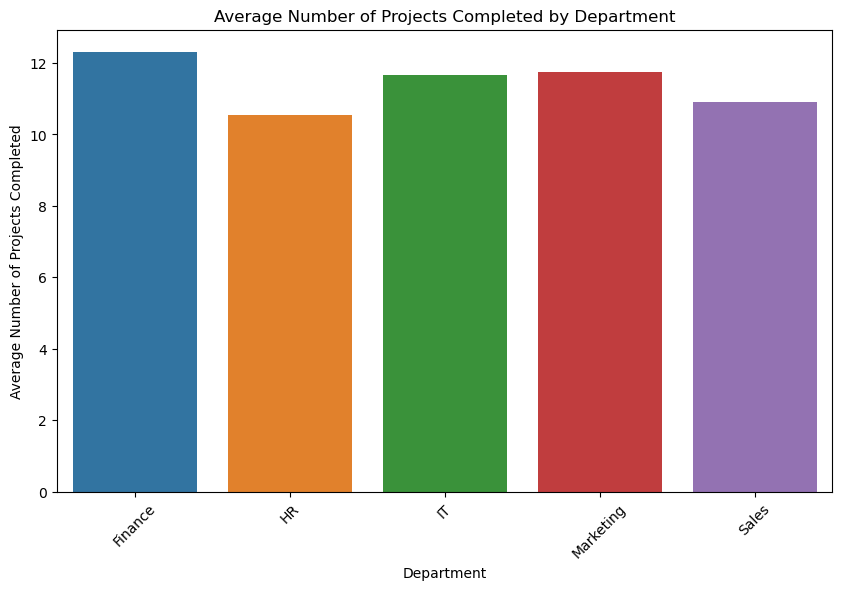

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x=department_performance.index, y=department_performance['Projects Completed']['mean'])
plt.title('Average Number of Projects Completed by Department')
plt.xlabel('Department')
plt.ylabel('Average Number of Projects Completed')
plt.xticks(rotation=45)
plt.show()


# 3) Tenure and Performance:

In [64]:
print(df['Joining Date'].unique())


['Jan-20' 'Jan-99' 'Jan-17' 'Jan-22' 'Jan-05' 'Jan-21' 'Jan-18' 'Jan-19'
 'Jan-04' 'Jan-13' 'Jan-07' 'Jan-11' 'Jan-12' 'Jan-08' 'Jan-06' 'Jan-01'
 'Jan-14' 'Jan-16' 'Jan-10' 'Jan-09' 'Jan-03' 'Jan-15' 'Jan-98' 'Jan-00'
 'Jan-02']


In [65]:
df['Joining Date'] = pd.to_datetime(df['Joining Date'], format='%b-%y', errors='coerce')

print(df['Joining Date'].head())


0   2020-01-01
1   1999-01-01
2   2017-01-01
3   2022-01-01
4   2005-01-01
Name: Joining Date, dtype: datetime64[ns]


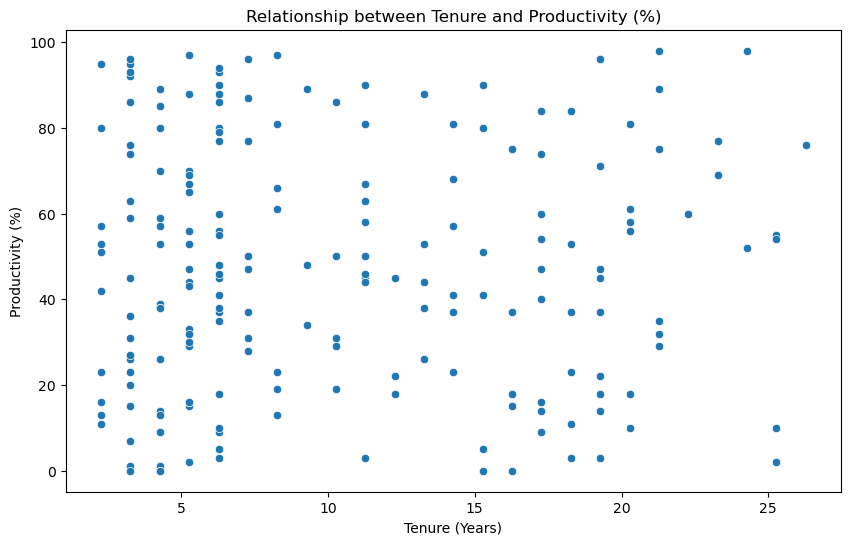

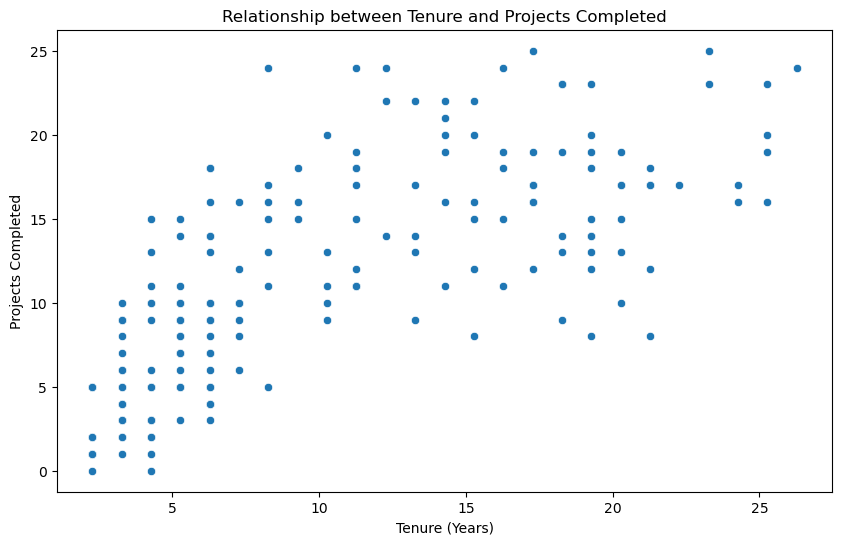

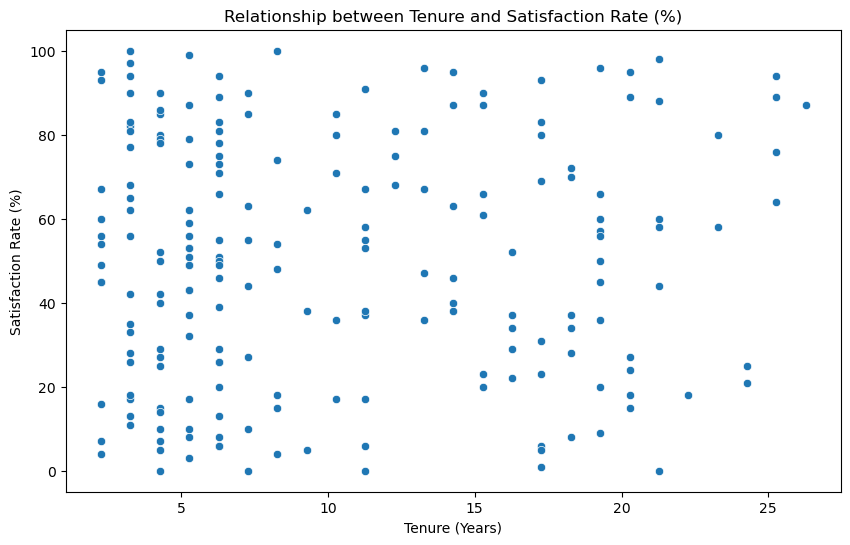

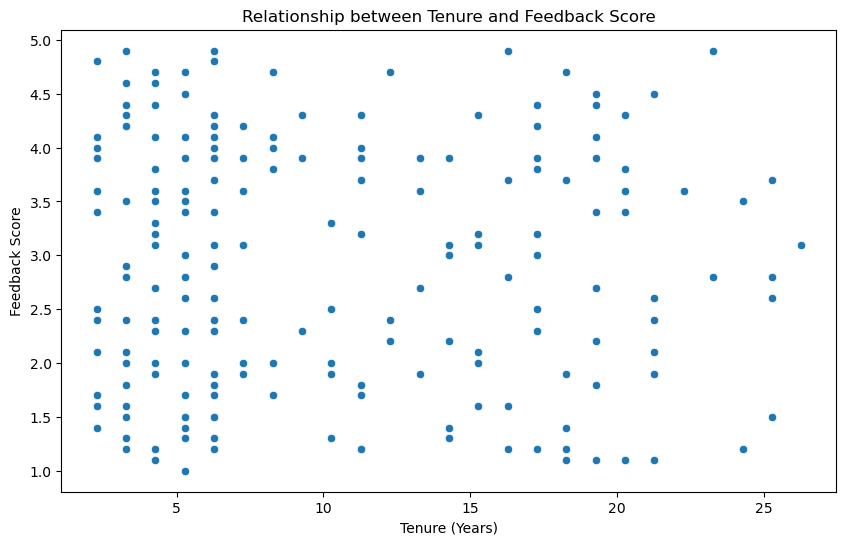

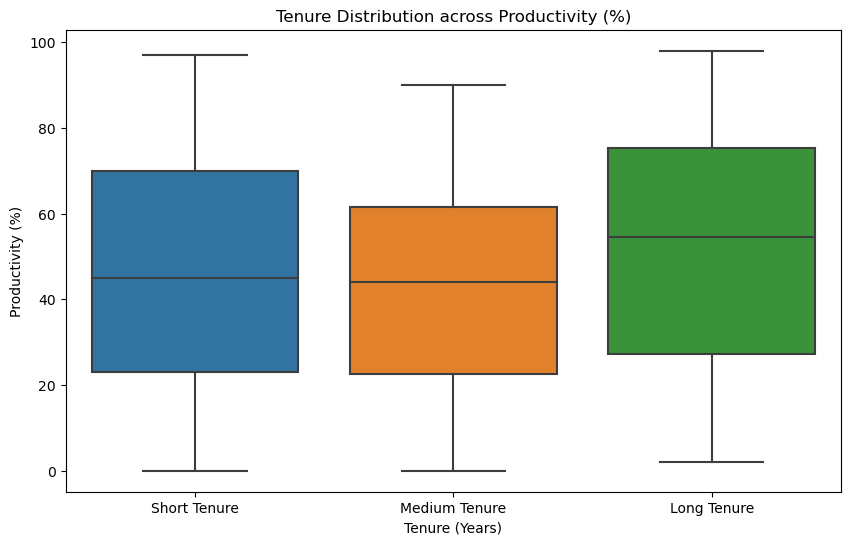

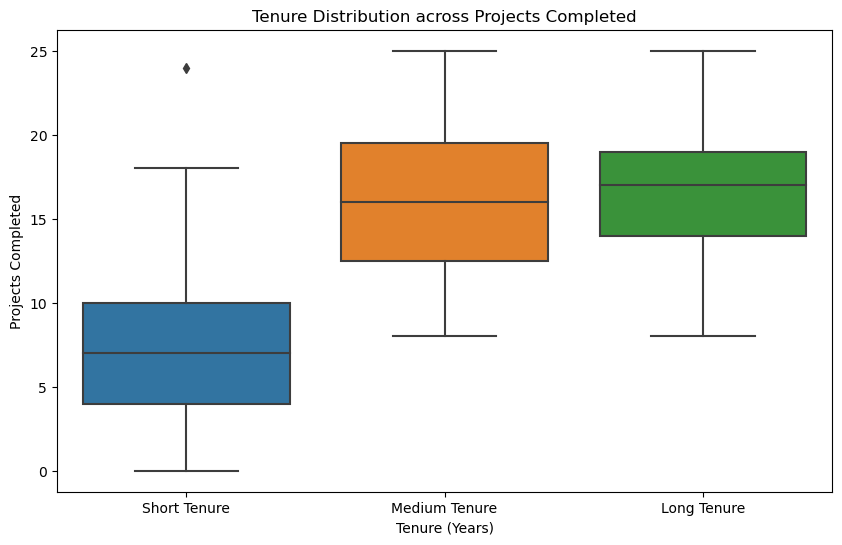

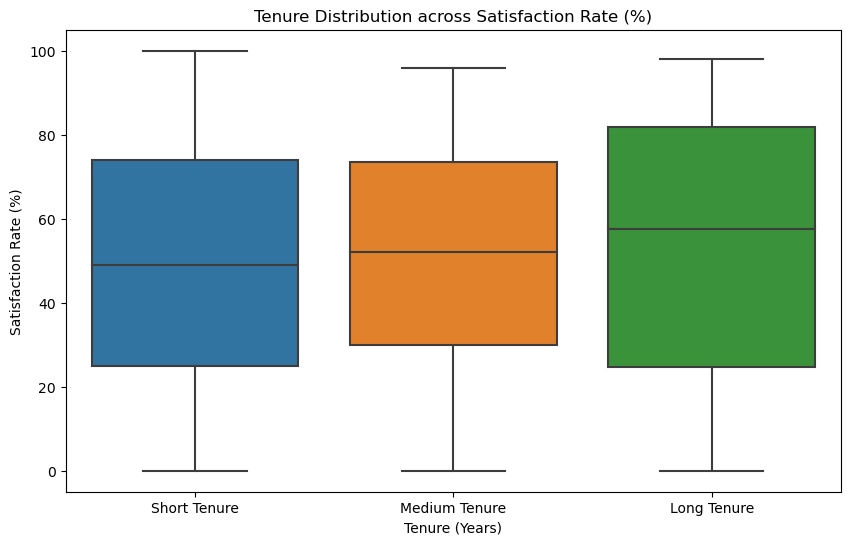

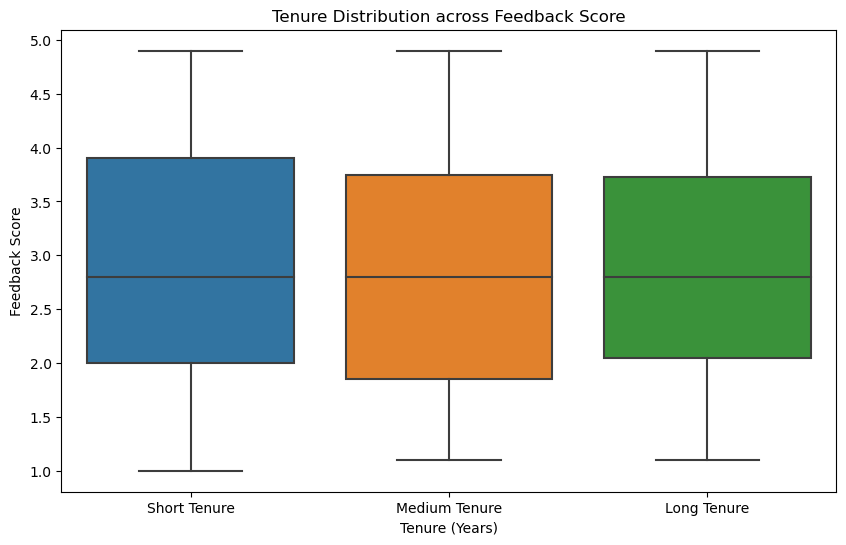

                       Tenure_years  Productivity (%)  Projects Completed  \
Tenure_years               1.000000          0.038483            0.724852   
Productivity (%)           0.038483          1.000000            0.061707   
Projects Completed         0.724852          0.061707            1.000000   
Satisfaction Rate (%)      0.049923          0.049897           -0.010815   
Feedback Score            -0.018824         -0.005948            0.083170   

                       Satisfaction Rate (%)  Feedback Score  
Tenure_years                        0.049923       -0.018824  
Productivity (%)                    0.049897       -0.005948  
Projects Completed                 -0.010815        0.083170  
Satisfaction Rate (%)               1.000000        0.008068  
Feedback Score                      0.008068        1.000000  


In [67]:
df['Tenure_years'] = df['Tenure'] / 365.25  # Assuming 365.25 days per year for leap years

for metric in performance_metrics:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Tenure_years', y=metric, data=df)
    plt.title(f'Relationship between Tenure and {metric}')
    plt.xlabel('Tenure (Years)')
    plt.ylabel(metric)
    plt.show()

tenure_bins_years = pd.cut(df['Tenure_years'], bins=3, labels=['Short Tenure', 'Medium Tenure', 'Long Tenure'])
for metric in performance_metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=tenure_bins_years, y=metric, data=df)
    plt.title(f'Tenure Distribution across {metric}')
    plt.xlabel('Tenure (Years)')
    plt.ylabel(metric)
    plt.show()


correlation_matrix_years = df[['Tenure_years'] + performance_metrics].corr()
print(correlation_matrix_years)


## Tenure vs. Productivity (%):
Correlation coefficient: 0.038
Insight: There is a very weak positive correlation between tenure and productivity (%). As tenure increases, there is a slight tendency for productivity (%) to increase, but the relationship is almost negligible.
    
## Tenure vs. Projects Completed:
 Correlation coefficient: 0.724
Insight: There is a moderate positive correlation between tenure and projects completed. Employees with longer tenure tend to complete more projects, indicating that experience or familiarity with tasks over time may contribute to higher project completion rates.
    
## Tenure vs. Satisfaction Rate (%):
 Correlation coefficient: 0.050
Insight: There is a very weak positive correlation between tenure and satisfaction rate (%). As tenure increases, there is a slight tendency for satisfaction rate (%) to increase, but the relationship is minimal.
    
## Tenure vs. Feedback Score:
Correlation coefficient: -0.019
Insight: There is a very weak negative correlation between tenure and feedback score. This indicates that there is almost no relationship between tenure and feedback score, suggesting that other factors may influence feedback scores more significantly.

In [68]:
df[['Productivity (%)','Tenure']].corr()

,Productivity (%),Tenure
Productivity (%),1.000000,0.038483
Tenure,0.038483,1.000000


### The correlation coefficient of 0.038 indicates that there is a very minimal positive correlation between employee tenure and productivity (%). In other words, as tenure increases, there is a slight tendency for productivity (%) to increase, but the relationship is very weak. This suggests that there may be other factors besides tenure that have a more significant influence on productivity within the organization.

# 4) Feedback Analysis:

       Feedback Score  Satisfaction Rate (%)
count      200.000000             200.000000
mean         2.883000              49.935000
std          1.123263              28.934353
min          1.000000               0.000000
25%          1.900000              25.750000
50%          2.800000              50.500000
75%          3.900000              75.250000
max          4.900000             100.000000


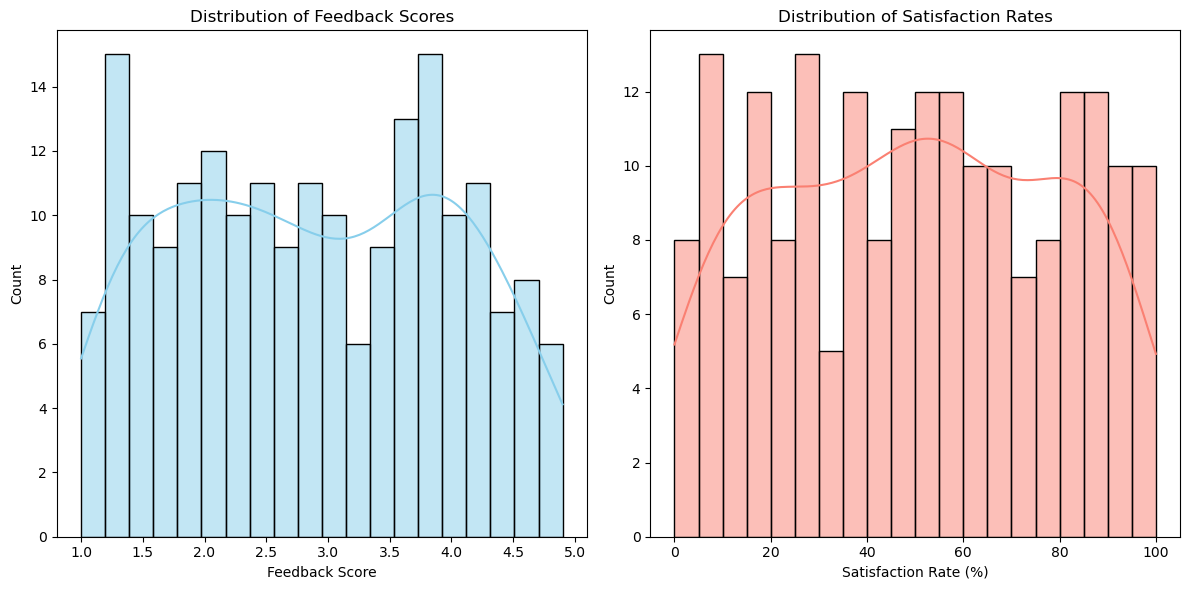

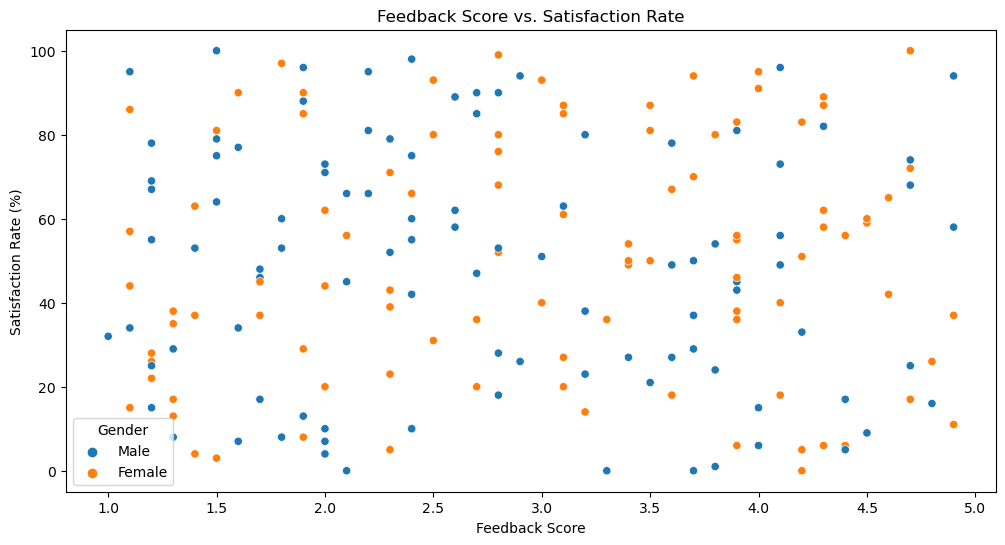

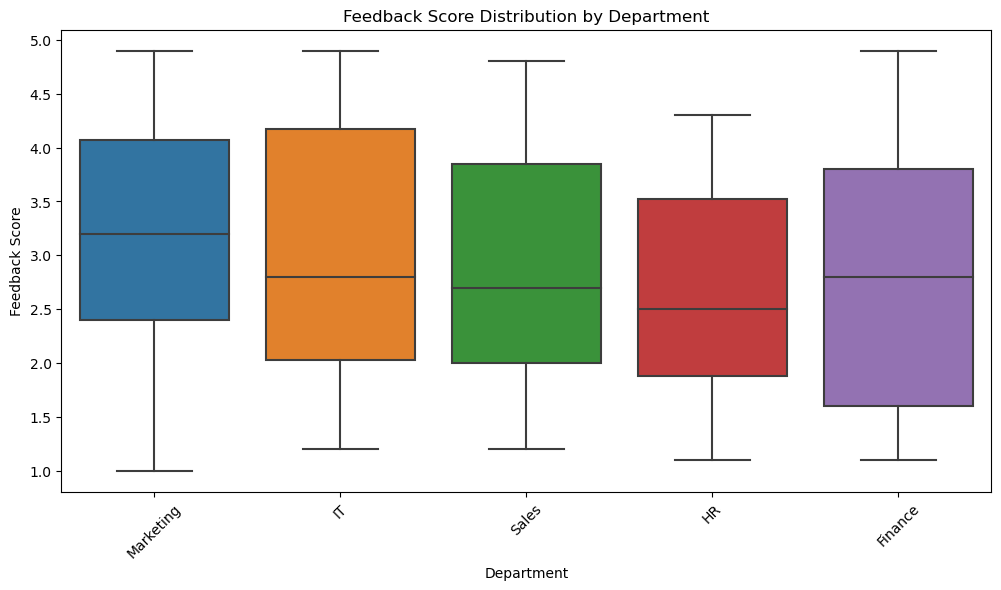

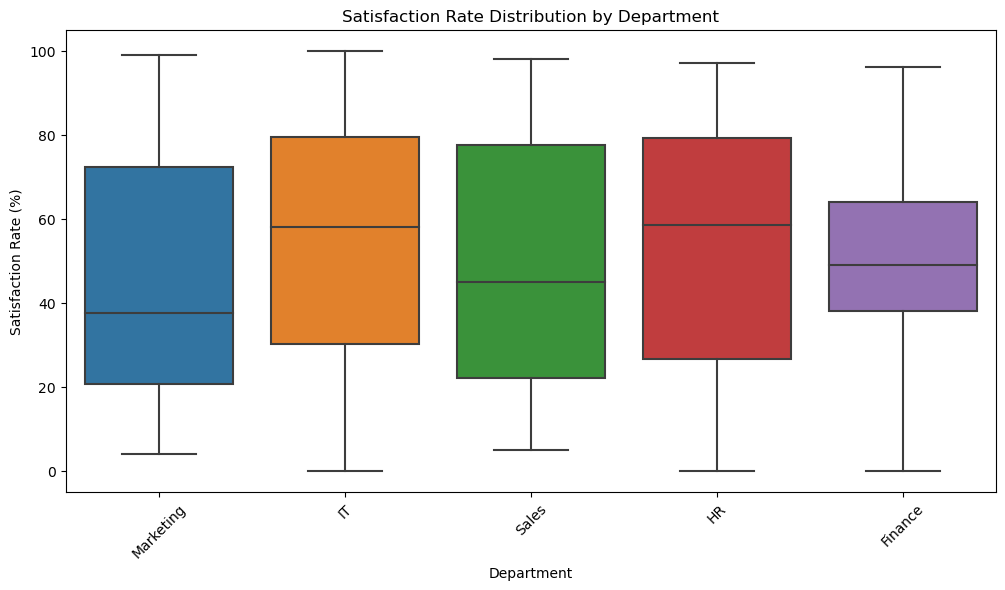

                       Feedback Score  Satisfaction Rate (%)
Feedback Score               1.000000               0.008068
Satisfaction Rate (%)        0.008068               1.000000


In [69]:
feedback_stats = df[['Feedback Score', 'Satisfaction Rate (%)']].describe()
print(feedback_stats)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Feedback Score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Feedback Scores')

plt.subplot(1, 2, 2)
sns.histplot(df['Satisfaction Rate (%)'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Satisfaction Rates')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Feedback Score', y='Satisfaction Rate (%)', data=df, hue='Gender')
plt.title('Feedback Score vs. Satisfaction Rate')
plt.xlabel('Feedback Score')
plt.ylabel('Satisfaction Rate (%)')
plt.legend(title='Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Feedback Score', data=df)
plt.title('Feedback Score Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Feedback Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Satisfaction Rate (%)', data=df)
plt.title('Satisfaction Rate Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction Rate (%)')
plt.xticks(rotation=45)
plt.show()

correlation_feedback = df[['Feedback Score', 'Satisfaction Rate (%)']].corr()
print(correlation_feedback)


# Insight:

###  The correlation coefficient of 0.008 indicates that there is a negligible positive correlation between feedback scores and satisfaction rates.

### In other words, there is almost no relationship between an employee's feedback score and their reported satisfaction rate

### This suggests that feedback scores and satisfaction rates are largely independent of each other within the dataset. Other factors may have a more significant impact on either feedback scores or satisfaction rates individually.

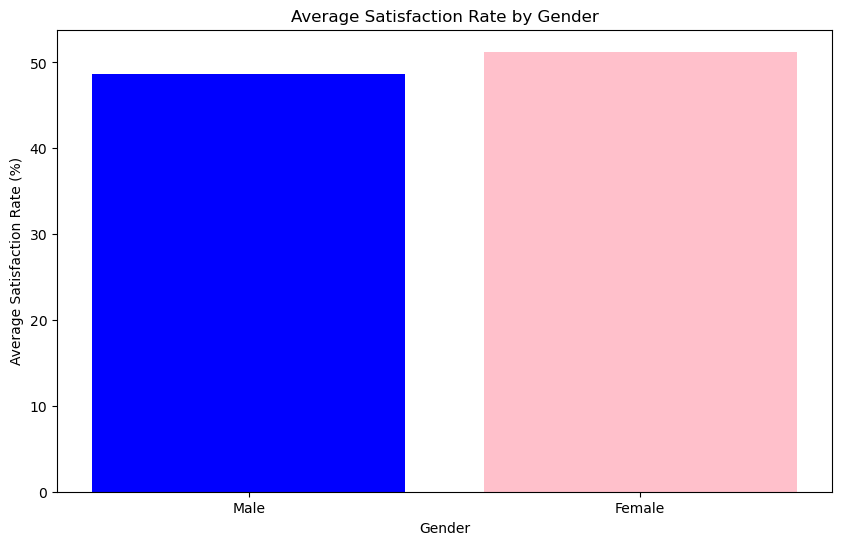

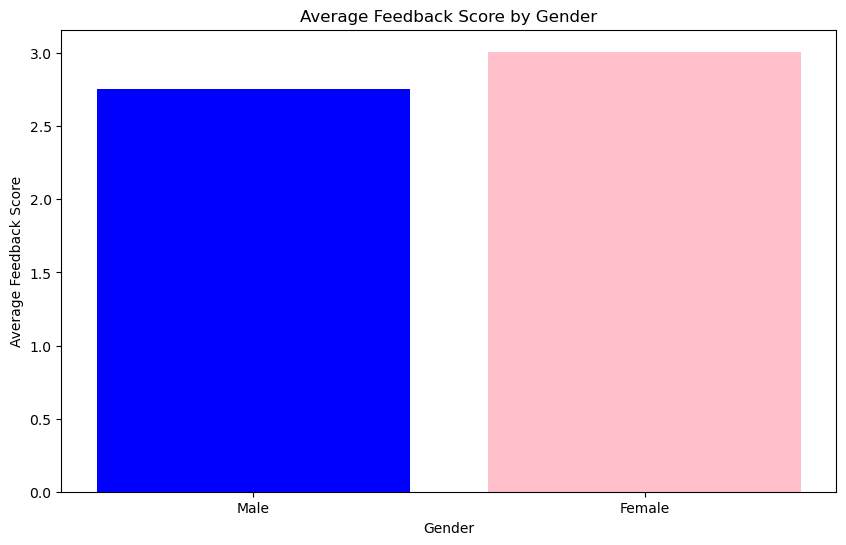

In [70]:
avg_satisfaction_male = df[df['Gender'] == 'Male']['Satisfaction Rate (%)'].mean()
avg_satisfaction_female = df[df['Gender'] == 'Female']['Satisfaction Rate (%)'].mean()
avg_feedback_male = df[df['Gender'] == 'Male']['Feedback Score'].mean()
avg_feedback_female = df[df['Gender'] == 'Female']['Feedback Score'].mean()

plt.figure(figsize=(10, 6))

plt.bar(['Male', 'Female'], [avg_satisfaction_male, avg_satisfaction_female], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rate (%)')
plt.title('Average Satisfaction Rate by Gender')
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(['Male', 'Female'], [avg_feedback_male, avg_feedback_female], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Average Feedback Score')
plt.title('Average Feedback Score by Gender')
plt.show()


In [71]:
df.groupby('Gender')['Satisfaction Rate (%)'].agg(("min","max","mean"))

,min,max,mean
Gender,,,
Female,0,100,51.25
Male,0,100,48.62


# 5) Salary Analysis:

> Investigate factors influencing salary levels within the organization.

> Analyze salary distributions across different demographics (e.g., age, gender, department).

> Visualize salary trends over time or by position.

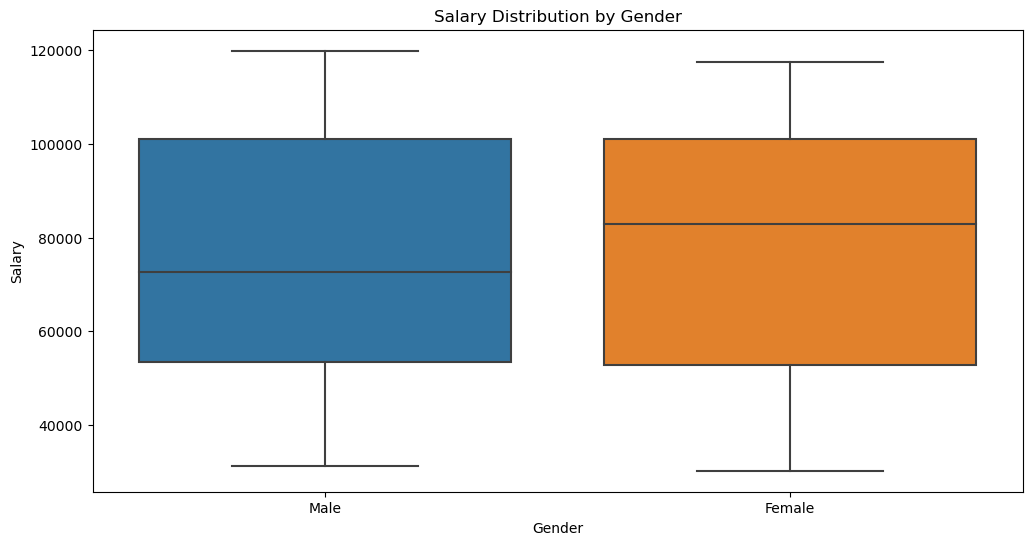

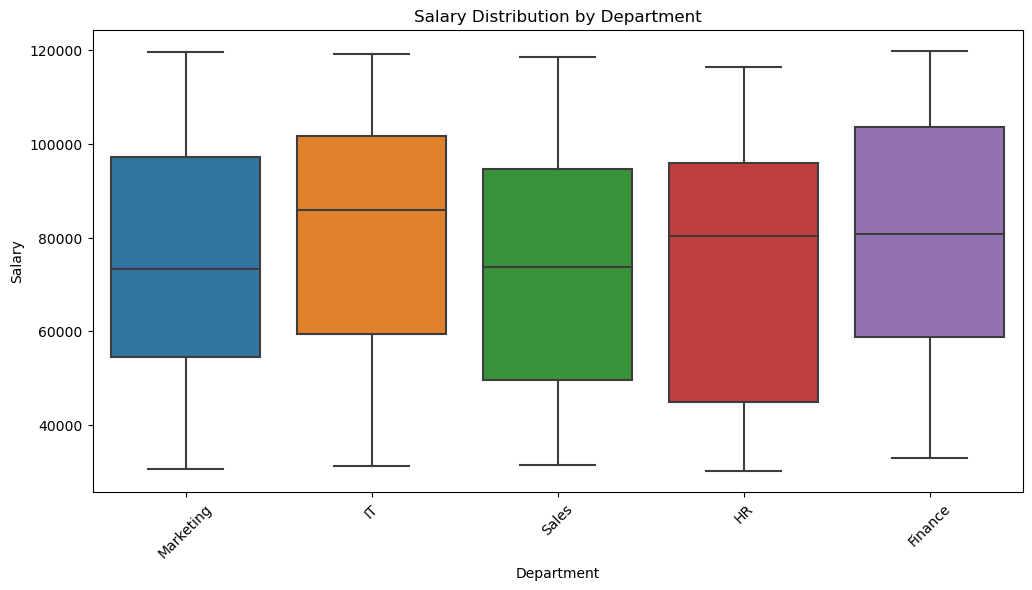

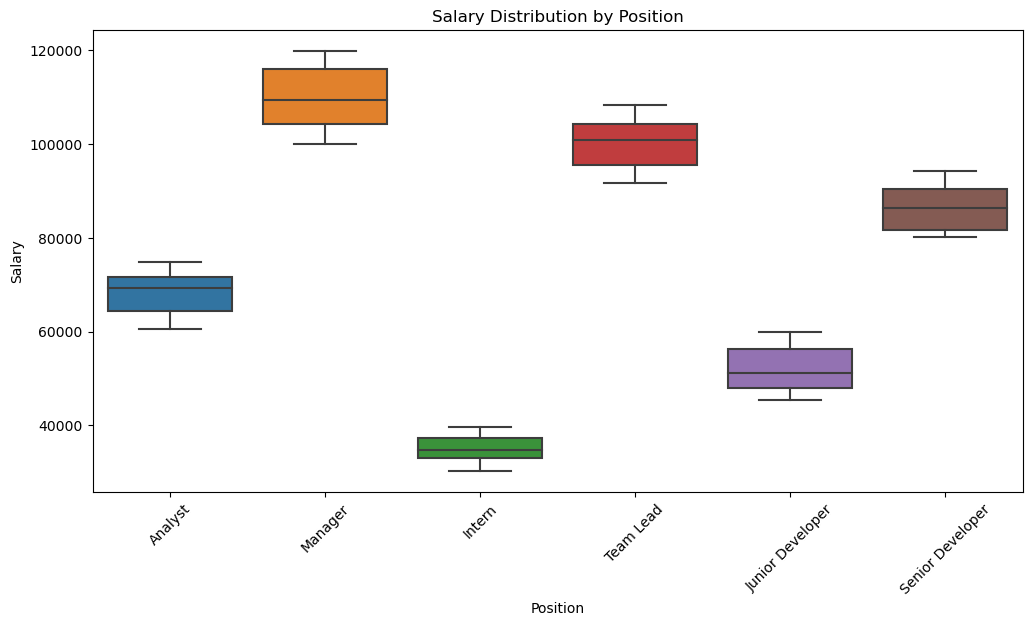

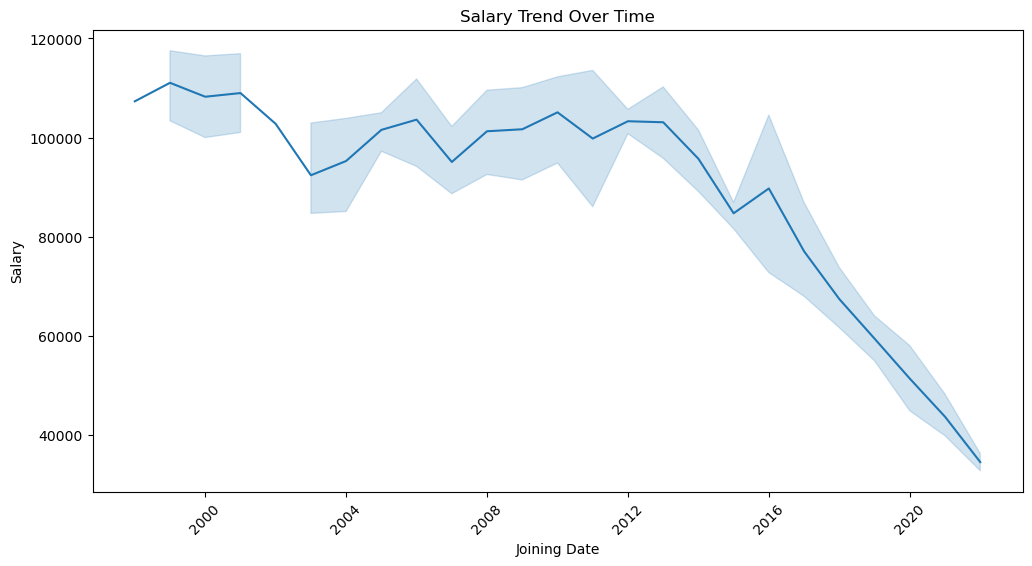

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Salary', data=df)
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(x='Joining Date', y='Salary', data=df)
plt.title('Salary Trend Over Time')
plt.xlabel('Joining Date')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

In [73]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[numeric_columns].corr()

print(correlation_matrix)


                            Age  Projects Completed  Productivity (%)  \
Age                    1.000000            0.758364          0.021193   
Projects Completed     0.758364            1.000000          0.061707   
Productivity (%)       0.021193            0.061707          1.000000   
Satisfaction Rate (%)  0.035284           -0.010815          0.049897   
Feedback Score         0.012014            0.083170         -0.005948   
Salary                 0.834550            0.874329          0.025519   
Tenure                 0.728668            0.724852          0.038483   
Tenure_years           0.728668            0.724852          0.038483   

                       Satisfaction Rate (%)  Feedback Score    Salary  \
Age                                 0.035284        0.012014  0.834550   
Projects Completed                 -0.010815        0.083170  0.874329   
Productivity (%)                    0.049897       -0.005948  0.025519   
Satisfaction Rate (%)               1.000000  

# Age:
The correlation coefficient between salary and age is approximately 0.835, indicating a strong positive correlation. This suggests that salary tends to increase with age within the dataset.

# Projects Completed: 
The correlation coefficient between salary and projects completed is approximately 0.874, indicating a strong positive correlation. This suggests that employees who complete more projects tend to have higher salaries.

# Productivity (%):
The correlation coefficient between salary and productivity is approximately 0.026, indicating a very weak positive correlation. This suggests that there's almost no relationship between productivity and salary within the dataset.

# Satisfaction Rate (%):
The correlation coefficient between salary and satisfaction rate is approximately -0.018, indicating a very weak negative correlation. This suggests that there's almost no relationship between satisfaction rate and salary within the dataset.

# Feedback Score:
The correlation coefficient between salary and feedback score is approximately 0.035, indicating a very weak positive correlation. This suggests that there's almost no relationship between feedback score and salary within the dataset.

# Tenure_years:
The correlation coefficient between salary and tenure (in years) is also approximately 0.789, indicating a strong positive correlation. This further confirms that salary tends to increase with tenure.

# Hypothesis Testing:

## ANOVA (Analysis of Variance)

In [74]:
from scipy.stats import f_oneway

department_salaries = {}
for department in df['Department'].unique():
    department_salaries[department] = df[df['Department'] == department]['Salary']

f_statistic, p_value = f_oneway(*department_salaries.values())

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)


F-Statistic: 0.622518259443673
P-Value: 0.6469738523336963


# Interpretation:

The ANOVA (Analysis of Variance) test is used to determine whether there are statistically significant differences in the means of salary among different groups. In this case, we're testing whether there are differences in salary among different departments.

The F-statistic measures the ratio of variance between the groups to the variance within the groups. It's a measure of how much the group means differ relative to the variation within the groups.

In our test, the F-statistic is 0.623, which is a ratio indicating how much variance exists between the salaries of different departments compared to the variance within each department.

The p-value associated with the F-statistic is 0.647. This p-value indicates the probability of observing an F-statistic as extreme as the one obtained, under the assumption that there are no differences in salary among the departments. A p-value greater than 0.05 suggests that we fail to reject the null hypothesis, meaning there are no significant differences in salary among the departments.

# Conclusion:

We do not have sufficient evidence to conclude that there is a significant difference in average salary across different departments at a significance level of 0.05.
The variation in average salary observed across departments in the data could be due to random variation.

# Regression Analysis

In [83]:
import statsmodels.api as sm

X = df[['Age', 'Salary']]
y = df['Productivity (%)']

X['Gender'] = (df['Gender'] == 'Male').astype(int)

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Productivity (%)   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.249
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.293
Time:                        20:50:36   Log-Likelihood:                -951.59
No. Observations:                 200   AIC:                             1911.
Df Residuals:                     196   BIC:                             1924.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.5898      7.904      5.009      0.0

## Introduction:
purpose of the regression analysis, which is to examine the relationship between predictor variables (Age, Gender, Salary) and the outcome variable (Productivity (%))

## Key Findings
1.The R-squared value indicates that the predictor variables explain only a small portion (1.9%) of the variation in productivity percentage.
2.The F-statistic and associated p-value suggest that the regression model as a whole is not statistically significant, meaning it doesn't effectively explain the variation in productivity percentage.

Among the predictor variables:
    
-Age has a very small and statistically insignificant effect on productivity percentage.

-Gender's effect on productivity percentage is not statistically significant at a 5% significance level.

-Salary also has a minimal effect on productivity percentage.

## Interpretation and Implications:
1.The lack of statistical significance for Age, Gender, and Salary indicates that these variables may not be reliable predictors of productivity percentage in this context.

2.It may be necessary to explore additional variables or employ different modeling techniques to better understand and predict productivity in the organization.

## Conclusion:
Despite including Age, Gender, and Salary as predictor variables, the regression model does not effectively predict productivity percentage.

Further research or analysis may be needed to identify additional factors influencing productivity and improve prediction accuracy.

# Chi-Square Test

Chi-Square Test to analyze the association between gender and the number of projects completed.

### > Contingency Table:

In [76]:
contingency_table = pd.crosstab(df['Gender'], df['Projects Completed'])
print(contingency_table)


Projects Completed  0   1   2   3   4   5   6   7   8   9   ...  16  17  18  \
Gender                                                      ...               
Female               0   3   3   5   4   8   2   3   4   8  ...   7   6   4   
Male                 2   3   4   4   3  10   4   3   4   7  ...   4   7   4   

Projects Completed  19  20  21  22  23  24  25  
Gender                                          
Female               4   3   1   0   5   4   0  
Male                 4   2   0   4   0   1   2  

[2 rows x 26 columns]


This contingency table shows the distribution of projects completed by gender.

For example, in the first row (False), representing females, we see that 0 projects were completed by 0 individuals, 1 project was completed by 3 individuals, 2 projects were completed by 3 individuals, and so on.

In the second row (True), representing males, we see similar distributions.

This table allows us to compare the distribution of projects completed between males and females. It provides a quick overview of the association between gender and the number of projects completed.

### > Compute Expected Frequencies:

In [77]:
import scipy.stats as stats

expected_freq = stats.contingency.expected_freq(contingency_table)
print(expected_freq)


[[1.  3.  3.5 4.5 3.5 9.  3.  3.  4.  7.5 7.  4.5 3.  4.  4.  4.5 5.5 6.5
  4.  4.  2.5 0.5 2.  2.5 2.5 1. ]
 [1.  3.  3.5 4.5 3.5 9.  3.  3.  4.  7.5 7.  4.5 3.  4.  4.  4.5 5.5 6.5
  4.  4.  2.5 0.5 2.  2.5 2.5 1. ]]


The expected frequencies represent the number of projects completed we would expect for each gender group if there were no association between gender and the number of projects completed.

### > Calculate Chi-Square Statistic:

In [78]:
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("p-value:", p_val)


Chi-Square Statistic: 21.64431124431124
Degrees of Freedom: 25
p-value: 0.6561905711535708


the chi-square statistic is 21.64, which indicates a moderate discrepancy between the observed and expected frequencies.

The degrees of freedom represent the number of independent pieces of information available to estimate a statistic. In this test, it's 25.

Finally, the p-value associated with the chi-square statistic is 0.656. This p-value indicates the probability of observing a chi-square statistic as extreme as the one obtained, under the assumption that there is no association between gender and projects completed. A p-value greater than 0.05 suggests that we fail to reject the null hypothesis, meaning there is no significant association between gender and projects completed.

In [79]:
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant association between gender and the number of projects completed.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between gender and the number of projects completed.")


Fail to reject the null hypothesis. There is no significant association between gender and the number of projects completed.


# Employee Performance Improvement Recommendations

### To provide actionable recommendations for improving overall employee performance and productivity within the organization based on the findings from our analyses, we can consider the following:

# 1.Training and Skill Development:
Offer targeted training programs to enhance employee skills based on performance metrics and feedback.
Focus on areas correlated with higher productivity, such as technical skills and communication.

# 2. Performance Incentives:
Implement performance-based incentive programs to motivate and reward high performers.
Align incentives with key performance drivers identified in the analysis.

# 3. Job Role Optimization:
Review and adjust job roles to better match employee strengths and interests.
Optimize roles based on regression analysis findings to enhance engagement and performance.

# 4. Feedback and Communication:
Encourage open communication and regular feedback between managers and employees.
Conduct frequent performance reviews to provide constructive guidance.

# 5. Work-Life Balance:
Promote work-life balance initiatives to prevent burnout and improve well-being.
Offer flexible work arrangements to accommodate individual needs.

# 6. Recognition and Appreciation:
Recognize and celebrate employee contributions and achievements.
Establish employee recognition programs to foster a positive work environment.

# 7. Continuous Improvement:
Monitor performance metrics and engagement levels regularly.
Review and refine strategies based on feedback and data to ensure effectiveness.
